# Linear Regression with Nonlinear Transformation
This code is implemented to answer questions 8-10 in homework 2 of the Learning from Data course at Caltech: http://work.caltech.edu/homework/hw2.pdf

In these problems, we shall explore how to perform linear regression on data that are not linearly separable by modifying them using nonlinear transformation.

## Problem Statement
Given a set of N 2D points, each point is labeled with a binary value -1 or +1. Our task is to use **linear regression** to find a line that best separates these points into 2 sets, each set contains as many points with the same label as possible. This line is called the decision boundary: when we receive a new data point, we can just plug it into our system and figure out its label by observing which side of the boundary it falls into.

This is a classification problem. If the data points are linearly separable, this problem can be solved using the **perceptron learning algorithm** which is implemented here: https://github.com/vkhoi/learning-from-data/blob/master/perceptron/perceptron.ipynb. However, we want to solve this problem with data that are **not linearly separable**. Even though **linear regression** is commonly used to solve the regression problem, here, we are interested in how to apply it into the classification problem.

In [88]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [89]:
# class Point 2D
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def asVector(self):
        return [self.x, self.y]
    
    @staticmethod
    def random():
        return Point(random.uniform(-1, 1), random.uniform(-1, 1))

In [90]:
# implementation of linear regression for fitting a set of data points
class LinearRegression:
    # this method receives the data points and finds a weight vector that best fits these points
    @staticmethod
    def fit(X, Y):
        N = len(X) # number of data points
        d = len(X[0]) # size of dimension
        
        # initialize matrix A to store the data points
        A = np.zeros((N, d + 1))
        # initialize column vector b which stores the y values
        b = np.zeros((N, 1))
        for i in range(N):
            A[i] = np.array([1] + X[i])
            b[i] = Y[i]
            
        # approximate Ax = b
        AT = np.transpose(A)
        w = np.dot(np.dot(np.linalg.inv(np.dot(AT, A)), AT), b)

        return w

In [91]:
# the target function produces noise 10% of them time
def targetFunction(X, makeNoise=False):
    res = np.sign(X[0]*X[0] + X[1]*X[1] - 0.6)
    if makeNoise:
        if random.randrange(10) == 0:
            return -res
        return res
    return res

In [92]:
def experiment(N, plot=False):
    # N is the number of data points to generate
    # initialize N random points
    # X0 and Y0 store the X and Y coordinates of points with label 1
    # X1 and Y1 store the X and Y coordinates of points with label -1
    training_examples = [Point.random() for _ in range(N)]
    A = [x for x in range(N) if targetFunction(training_examples[x].asVector(), True) == 1]
    B = [x for x in range(N) if targetFunction(training_examples[x].asVector(), True) == -1]
    X0 = [training_examples[A[_]].x for _ in range(len(A))]
    Y0 = [training_examples[A[_]].y for _ in range(len(A))]
    X1 = [training_examples[B[_]].x for _ in range(len(B))]
    Y1 = [training_examples[B[_]].y for _ in range(len(B))]

    # create data to put into the linear regression class for fitting
    X = [training_examples[A[_]].asVector() for _ in range(len(A))] + [training_examples[B[_]].asVector() for _ in range(len(B))]
    Y = [1] * len(A) + [-1] * len(B)
    
    # fit the data points
    W = LinearRegression.fit(X, Y)

    if plot:
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.scatter(X0, Y0, color="r")
        plt.scatter(X1, Y1, color="b")
        plt.plot()
        
    return [W, X, Y]

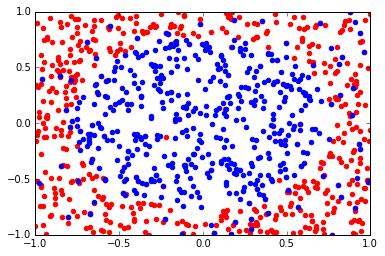

In [93]:
# Example run
experiment(1000, True);

In [86]:
# Question 8
N_experiments = 1000 # number of experiments
N_points = 1000 # number of data points to generate in each experiment
E_in = 0 # in-sample error
for _ in range(N_experiments):
    [W, X, labels] = experiment(N_points)
    misclassified = 0
    for i in range(len(X)):
        v = np.dot(np.transpose(W), [1] + X[i])
        if np.sign(v) != labels[i]:
            misclassified += 1
    E_in += misclassified / N_points
E_in /= N_experiments
print('Question 8: The average value of E_in is ', E_in)

Question 8: The average value of E_in is  0.5076659999999998


In [138]:
# We genrate a training set for both question 9 and 10
N_points = 1000
X = []
Y = []
for i in range(N_points):
    point = Point.random()
    y = targetFunction(point.asVector(), makeNoise=True)
    if y == 0:
        continue
    x = [point.x, point.y, point.x*point.y, point.x*point.x, point.y*point.y]
    X.append(x)
    Y.append(y)

# Question 9
W = LinearRegression.fit(X, Y)

# Hypotheses a-e in question 9
H = [[-1, -0.05, 0.08, 0.13, 1.5, 1.5],
     [-1, -0.05, 0.08, 0.13, 1.5, 15],
     [-1, -0.05, 0.08, 0.13, 15, 1.5],
     [-1, -1.5, 0.08, 0.13, 0.05, 0.05],
     [-1, -0.05, 0.08, 1.5, 0.15, 0.15]]

# Keep the error for each hypothesis
E = [0] * 5
for _ in range(N_points):
    x = [1] + X[_]
    W_val = np.sign(np.dot(np.transpose(W), x))
    for i in range(5):
        val = np.sign(np.dot(H[i], x))
        if val != W_val:
            E[i] += 1
E = [x / N_points for x in E]
print('Question 9: The in-sample error for each hypothesis compared with our computed hypothesis is: ', E)

Question 9: The in-sample error for each hypothesis compared with our computed hypothesis is:  [0.026, 0.353, 0.364, 0.34, 0.406]


In [137]:
# Question 10
N_points = 1000
E_out = 0
for _ in range(N_points):
    point = Point.random()
    y = targetFunction(point.asVector(), makeNoise=True)
    if y == 0:
        continue
    x = [1, point.x, point.y, point.x*point.y, point.x*point.x, point.y*point.y]
    W_val = np.sign(np.dot(np.transpose(W), x))
    if W_val != y:
        E_out += 1
E_out /= N_points
print('Question 10: The out-sample error of our computed hypothesis using linear regression is: ', E_out)

Question 10: The out-sample error of our computed hypothesis using linear regression is:  0.125
